In [18]:
!pip install keras-tuner

In [19]:
from tensorflow import keras
from keras.layers import BatchNormalization, Dropout, MaxPool2D
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data_mnist=keras.datasets.mnist

In [21]:
(train_images, train_labels), (test_images, test_labels)=data_mnist.load_data()

In [22]:
#checking the unique elements in labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 0, '3')

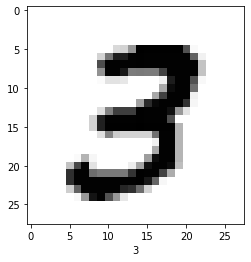

In [23]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.xlabel(train_labels[7])

In [24]:
#scaling our values between 0-1
train_images=train_images/255.0
test_images=test_images/255.0

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
#converting data into rank 4
train_images=train_images.reshape((len(train_images)),28,28,1)
test_images=test_images.reshape((len(test_images)),28,28,1)

In [27]:
#defining the model along with hyperparameters
def model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter, filter means that if i gave 32 as filter means i learned 32 filters or features if 48 it means i learned 48 features from my image features might include verticak edge detection, horizontal edges etc
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='valid',
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(strides=(1,1)),

    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        padding='valid',
        activation='relu'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(strides=(1,1)),

    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=128, max_value=256, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        padding='valid',
        activation='relu'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(strides=(1,1)),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dropout(rate=hp.Choice('dropout_1', values = [0.001, 0.1, 0.5])),

    keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=48, max_value=128, step=16),
        activation='relu'
    ),    
    keras.layers.Dropout(rate=hp.Choice('dropout_2', values = [0.001, 0.1, 0.5])),


    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1 ,1e-2, 1e-3 ])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [28]:
tuner_search=RandomSearch(model,
                          objective='val_accuracy',
                          max_trials=10,directory='output',project_name="Mnist_data")

INFO:tensorflow:Reloading Oracle from existing project output/Mnist_data/oracle.json


In [29]:
tuner_search.search(train_images,train_labels,epochs=20,validation_split=0.3)

Trial 10 Complete [00h 10m 23s]
val_accuracy: 0.10794444382190704

Best val_accuracy So Far: 0.9913889169692993
Total elapsed time: 01h 42m 00s
INFO:tensorflow:Oracle triggered exit


In [30]:


model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 80)        64080     
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 19, 80)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 224)       4

In [31]:
loss, accuracy =model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0324 - accuracy: 0.9923
0.032415129244327545 0.9922999739646912


In [32]:
model.fit(train_images, train_labels, epochs=20, validation_split=0.3, initial_epoch=10)

Epoch 11/20
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0822 - accuracy: 0.9786 - val_loss: 0.0396 - val_accuracy: 0.9911
Epoch 12/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0786 - accuracy: 0.9795 - val_loss: 0.0411 - val_accuracy: 0.9909
Epoch 13/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0692 - accuracy: 0.9825 - val_loss: 0.0394 - val_accuracy: 0.9919
Epoch 14/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0659 - accuracy: 0.9839 - val_loss: 0.0423 - val_accuracy: 0.9903
Epoch 15/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0598 - accuracy: 0.9858 - val_loss: 0.0474 - val_accuracy: 0.9901
Epoch 16/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0542 - accuracy: 0.9872 - val_loss: 0.0369 - val_accuracy: 0.9923
Epoch 17/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0496 - accuracy: 0.9884 - val_loss: 0

In [33]:
import tensorflow as tf

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)



In [34]:


test_images = test_images.reshape(-1,28,28)
test_images.shape



(10000, 28, 28)

In [35]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

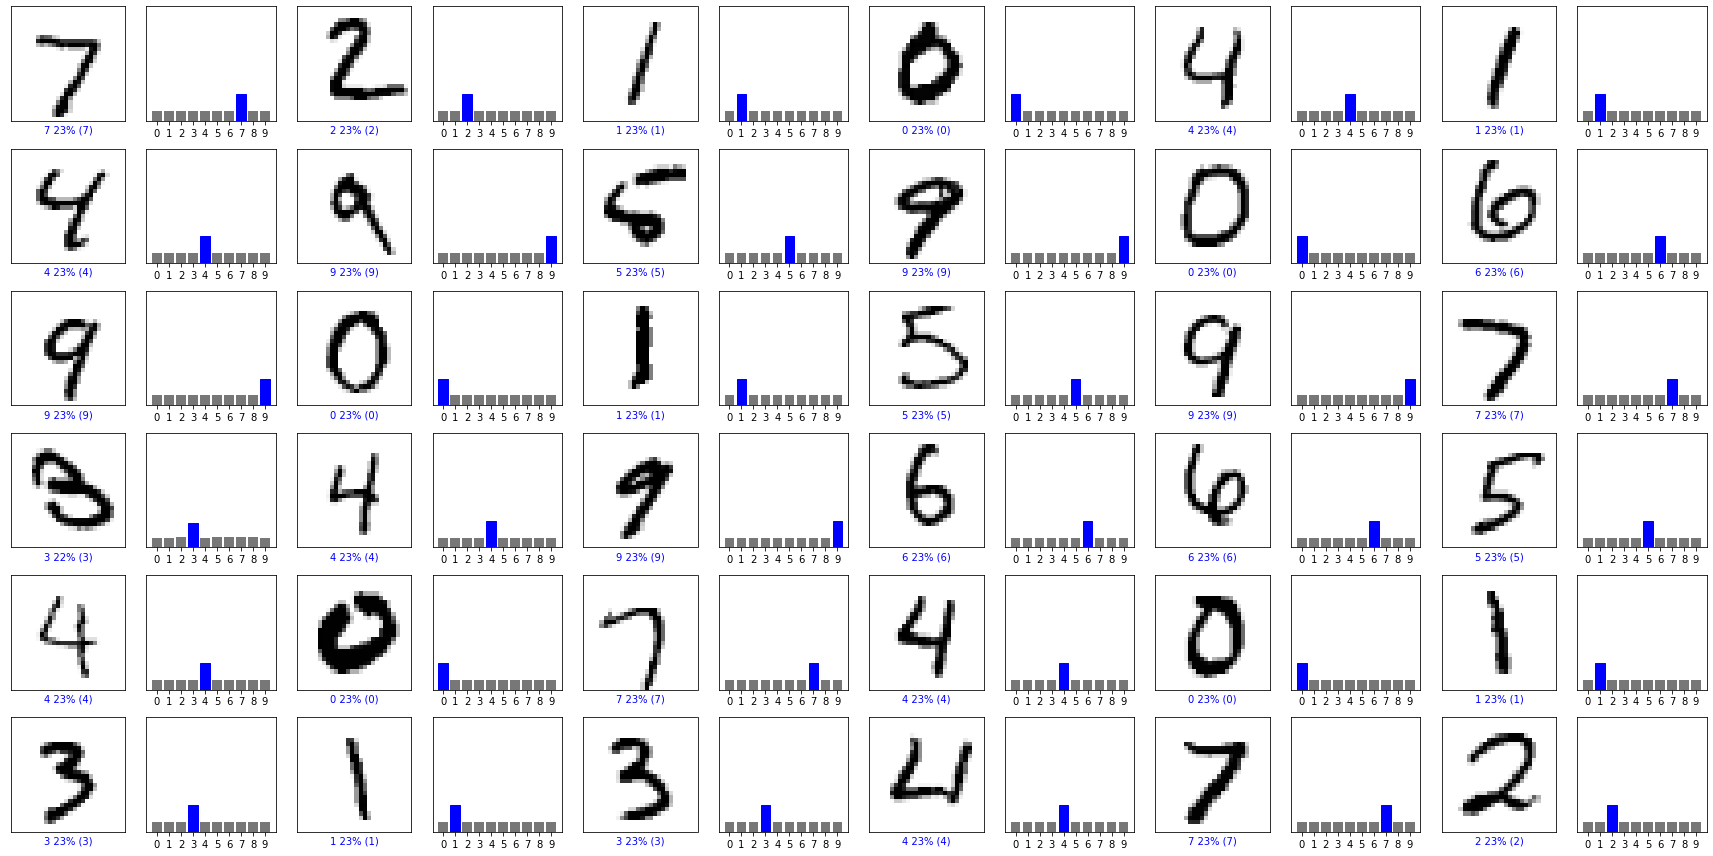

In [37]:
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()